In [330]:
using Plots
using Random

In [ ]:


# Функция, которую мы хотим минимизировать
function objective_function(x)
    return (x-5)*(x-2)*(x+5)^2
end

# Преобразование двоичного числа в десятичное
function binary_to_decimal(binary_array)
    return sum(binary_array .* 2 .^ (length(binary_array)-1:-1:0))
end

# Инициализация популяции
function initialize_population(pop_size, chromosome_length)
    return [rand([0, 1], chromosome_length) for _ in 1:pop_size]
end

# Оценка приспособленности
function evaluate_fitness(population, chromosome_length, search_space)
    return [objective_function(binary_to_decimal(chromosome)) for chromosome in population]
end
function select(population, fitness, pop_size)
    sort_fitness = sortperm(fitness)
    return population[sort_fitness][1:pop_size]
end
# Селекция (рулеточный метод)
function selection(population, fitness)
    total_fitness = sum(fitness)
    pick = rand() * total_fitness
    cumulative = 0.0
    for (i, f) in enumerate(fitness)
        cumulative += f
        if cumulative > pick
            return population[i]
        end
    end
    return population[end]
end

# Кроссовер (одноточечный)
function crossover(parent1, parent2)
    point = rand(1:length(parent1))
    child1 = vcat(parent1[1:point], parent2[point+1:end])
    child2 = vcat(parent2[1:point], parent1[point+1:end])
    return child1, child2
end

# Мутация
function mutate(chromosome, mutation_rate)
    for i in 1:length(chromosome)
        if rand() < mutation_rate
            chromosome[i] = 1 - chromosome[i]
        end
    end
    return chromosome
end

# Генетический алгоритм
function genetic_algorithm(pop_size, chromosome_length, generations, mutation_rate, search_space)
    population = initialize_population(pop_size, chromosome_length)
    g_chro = binary_to_decimal(population[argmin(evaluate_fitness(population, chromosome_length, search_space))])
    g_min = objective_function(g_chro) 
    hist = [g_chro]
    for generation in 1:generations
        fitness = evaluate_fitness(population, chromosome_length, search_space)
        population = select(population, fitness, pop_size)
        fitness = evaluate_fitness(population, chromosome_length, search_space)
        best_fitness = minimum(fitness)
        println("Generation $generation, Best Fitness: $best_fitness")
        new_population = copy(population)

        for _ in 1:(pop_size ÷ 2)
            parent1 = selection(population, fitness)
            parent2 = selection(population, fitness)
            child1, child2 = crossover(parent1, parent2)
            push!(new_population, mutate(child1, mutation_rate))
            push!(new_population, mutate(child2, mutation_rate))
        end

        best_chromosome = population[argmin(evaluate_fitness(population, chromosome_length, search_space))]
        best_solution = objective_function(binary_to_decimal(best_chromosome))
        if best_solution < g_min
            g_min = best_solution
            g_chro = binary_to_decimal(best_chromosome)
        end
        push!(hist, g_chro)
        population = new_population
    end

    return g_min, hist
end

# Параметры алгоритма
pop_size = 2
chromosome_length = 3
generations = 10000
mutation_rate = 0.3
search_space = 10  # Диапазон поиска для переменной

# Запуск генетического алгоритма
best_solution, hist = genetic_algorithm(pop_size, chromosome_length, generations, mutation_rate, search_space)
println("Best Solution: ", best_solution)


Generation 1, Best Fitness: 250
Generation 2, Best Fitness: -128
Generation 3, Best Fitness: -162
Generation 4, Best Fitness: -162
Generation 5, Best Fitness: -162
Generation 6, Best Fitness: -162
Generation 7, Best Fitness: -162
Generation 8, Best Fitness: -162
Generation 9, Best Fitness: -162
Generation 10, Best Fitness: -162
Generation 11, Best Fitness: -162
Generation 12, Best Fitness: -162
Generation 13, Best Fitness: -162
Generation 14, Best Fitness: -162
Generation 15, Best Fitness: -162
Generation 16, Best Fitness: -162
Generation 17, Best Fitness: -162
Generation 18, Best Fitness: -162
Generation 19, Best Fitness: -162
Generation 20, Best Fitness: -162
Generation 21, Best Fitness: -162
Generation 22, Best Fitness: -162
Generation 23, Best Fitness: -162
Generation 24, Best Fitness: -162
Generation 25, Best Fitness: -162
Generation 26, Best Fitness: -162
Generation 27, Best Fitness: -162
Generation 28, Best Fitness: -162
Generation 29, Best Fitness: -162
Generation 30, Best Fitn

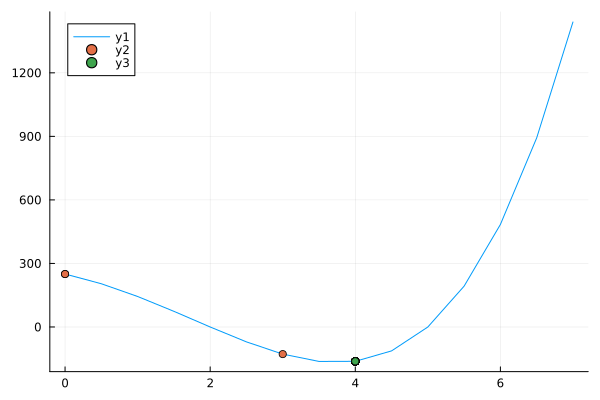

In [332]:
plot([i for i ∈ 0:0.5:7], [objective_function(i) for i ∈ 0:0.5:7])
scatter!([h for h ∈ hist], [objective_function(h) for h ∈ hist])
scatter!([hist[end]], [objective_function(hist[end])])